# Model Development and Evaluation
----------------------------------

In this notebook, I've tried to make a linear regression model to predict house prices based on the data cleaned and features found from the Data Wrangling and Exploratory Analysis notebook. 

# Setup

First, we need to get started by importing the libraries, setting some options and importing the data.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
%matplotlib inline
sns.set(color_codes=True)
pd.set_option('display.max_columns', None)

In [3]:
file_path = 'Final Data.csv'
df = pd.read_csv(file_path)

# Multiple Linear Regression Model

## Building the model

We would first be building a MLR model. From the exploratory analysis, we know that the important features are:
* sqft_above
* sqft_living15
* sqft_living
* sqft_basement
* bedrooms
* bathrooms
* waterfront
* floors
* lat
* view 
* grade

The first step would be to create X and y. 

In [4]:
X = df[['sqft_above', 'sqft_living15', 'sqft_living', 'sqft_basement', 'bedrooms', 'bathrooms', 'waterfront', 'floors', 'lat', 'view' , 'grade']]
y = df[['price']]

Then, we need to split the data. 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Now, let's create the model.

In [16]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

## Testing and evaluating the model

Let's test the model by getting prediction values and making a distribution plot.

In [17]:
yhat_test = lm.predict(X_test)
yhat_test_df = pd.DataFrame(yhat_test, columns=['predicted_price'])

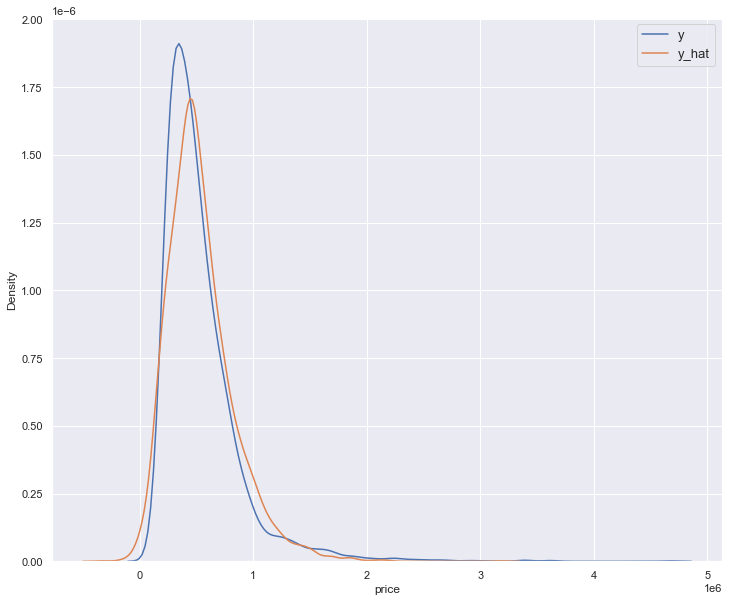

In [18]:
plt.figure(figsize=(12,10))
ax = sns.kdeplot(y_test['price'])
ax = sns.kdeplot(yhat_test_df['predicted_price'], ax=ax)
ax.legend(['y', 'y_hat'], fontsize=13);

That looks a really good estimate. We should also get some numeric values. Let's get the R-squared value.

In [19]:
lm.score(X_test, y_test)

0.6572834971706469

So, there's room for improvement. 

If we take a look at the graphs in the exploratory analysis, we can see them some features (say grade) have a non-linear relationship. So, we need to make a polynomial linear regression model to take those into account properly.

Furthermore, it would be helpfult to normalize the variables, so that few variables might not dominate the model

# Polynomial Regression and Normalization

The best way to go at it would be create a pipeline.

## Creating a pipeline

We will create a pipeline that will first normalize the values (using standard scalar), create polynomial features (with degree of 2) and then use linear model to predict the data. 

Let's create the pipeline

In [20]:
pipe_info = [('Normalize', StandardScaler()), ('Polynomial Features', PolynomialFeatures(include_bias=False)), ('Linear Model', LinearRegression())]
pipe = Pipeline(pipe_info)

Now let's use the pipeline

In [21]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('Normalize', StandardScaler()),
                ('Polynomial Features', PolynomialFeatures(include_bias=False)),
                ('Linear Model', LinearRegression())])

In [22]:
yhat_test_pipe = pipe.predict(X_test)
yhat_test_pipe_df = pd.DataFrame(yhat_test_pipe, columns=['predicted_price'])

Now let's plot it and see what we get.

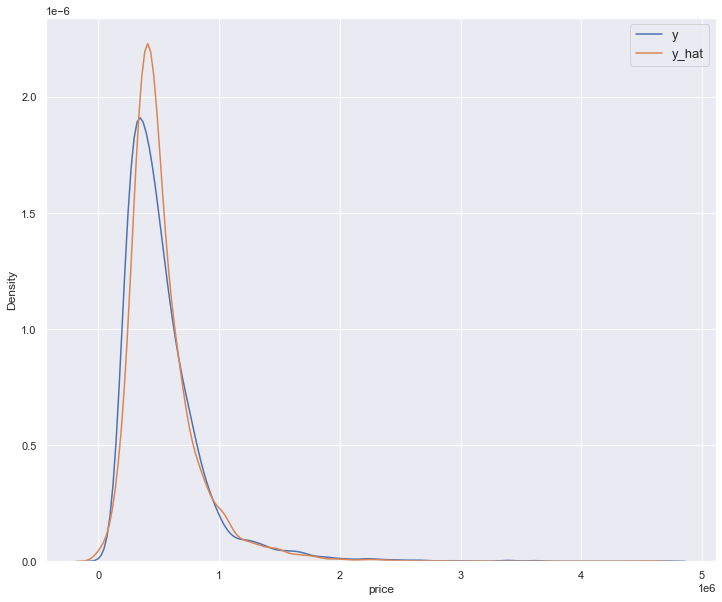

In [23]:
plt.figure(figsize=(12,10))
ax = sns.kdeplot(y_test['price'])
ax = sns.kdeplot(yhat_test_pipe_df['predicted_price'], ax=ax)
ax.legend(['y', 'y_hat'], fontsize=13);

In [24]:
pipe.score(X_test, y_test)

0.7387186711572331

A better score. Let's do some cross validation as the final check.

# Cross-validation

We would be doing a k-fold cross-validation with 5 folds. We would getting the R-squared values.

Let's get started.

In [28]:
cv_scores = cross_val_score(estimator=pipe, X=X, y=y, cv=5)
cv_scores

array([0.75834285, 0.73928231, 0.71439079, 0.7043902 , 0.73660863])

Finally, we need to get summary of the array.

In [29]:
pd.Series(cv_scores).describe()

count    5.000000
mean     0.730603
std      0.021394
min      0.704390
25%      0.714391
50%      0.736609
75%      0.739282
max      0.758343
dtype: float64

That seems like a decent result.  

# Conclusion

There we go. A linear regression to predict houseprices. Although there is room for improvement, it's still a decent model. 

The method to go forward be using techniques such as OLS or Ridge Regression.

# Author
By Abhinav Garg